In [1]:
import os
import numpy as np
import pickle

In [2]:
def save_pickle(data, file_name):
    """
    Saves data as pickle format
    """
    with open(file_name, 'wb') as f:
        pickle.dump(data, f)
    return None

In [2]:
cwd = os.getcwd()
parent_wd = cwd.replace('/preprocessing', '')
processed_xy_path = parent_wd + '/preprocessing/processed_data_xy_mode'

In [3]:
with open(processed_xy_path, 'rb') as f:
    output_xy_mode_read = pickle.load(f)

## assign train/dev/test set

In [5]:
n_benchmark_withgrade = len(output_xy_mode_read['X_dict_benchmark_withgrade'])
n_benchmark_nograde = len(output_xy_mode_read['X_dict_benchmark_nograde'])
n_withgrade = len(output_xy_mode_read['X_dict_withgrade'])
n_nograde = len(output_xy_mode_read['X_dict_nograde'])
print('Number of benchmarked samples with user grade = %s' %n_benchmark_withgrade)
print('Number of benchmarked samples without user grade = %s' %n_benchmark_nograde)
print('Number of non-benchmarked samples with user grade = %s' %n_withgrade)
print('Number of non-benchmarked samples without user grade = %s' %n_nograde)

Number of benchmarked samples with user grade = 358
Number of benchmarked samples without user grade = 9
Number of non-benchmarked samples with user grade = 8607
Number of non-benchmarked samples without user grade = 21660


In [6]:
X_dict_usergrade_merge = {**output_xy_mode_read['X_dict_benchmark_withgrade'] , **output_xy_mode_read['X_dict_withgrade']}
Y_dict_usergrade_merge = {**output_xy_mode_read['Y_dict_benchmark_withgrade'] , **output_xy_mode_read['Y_dict_withgrade']}

In [7]:
X_dict_nograde_merge = {**output_xy_mode_read['X_dict_benchmark_nograde'] , **output_xy_mode_read['X_dict_nograde']}
Y_dict_nograde_merge = {**output_xy_mode_read['Y_dict_benchmark_nograde'] , **output_xy_mode_read['Y_dict_nograde']}

In [8]:
X_dict_merge = {**X_dict_usergrade_merge, **X_dict_nograde_merge}
Y_dict_merge = {**Y_dict_usergrade_merge, **Y_dict_nograde_merge}

In [9]:
n_sample = len(Y_dict_merge)
X_data_merge = np.zeros((n_sample, 30, 10))
Y_difficulties_merge = np.zeros(n_sample)
Y_isbenchmark_merge = np.zeros(n_sample)
keys_merge = []
tmax_merge = np.zeros(n_sample)

i = 0
for key, value in X_dict_merge.items():
    X_data = value.T
    X_data_merge[i, 0:X_data.shape[0], :] = X_data
    Y_difficulties_merge[i] = Y_dict_merge[key][0]
    Y_isbenchmark_merge[i] = Y_dict_merge[key][1]
    keys_merge.append(key)
    tmax_merge[i] = X_data.shape[0]
    i = i + 1

In [49]:
n_dev = 3000
n_test = 3000
n_train = n_sample - n_dev - n_test

In [53]:
shuffle = np.random.choice(np.arange(n_sample), n_sample, replace = False)

In [56]:
X_data_shuffle = X_data_merge[shuffle, :, :]
Y_difficulties_shuffle = Y_difficulties_merge[shuffle]
Y_isbenchmark_shuffle = Y_isbenchmark_merge[shuffle]
keys_shuffle = np.array(keys_merge)[shuffle]
tmax_shuffle = tmax_merge[shuffle]

In [59]:
training_set = {'X': X_data_shuffle[0:n_train], 
                'Y': Y_difficulties_shuffle[0:n_train], 
                'isbenchmark': Y_isbenchmark_shuffle[0:n_train], 
                'keys': keys_shuffle[0:n_train], 
                'tmax': tmax_shuffle[0:n_train]}
dev_set = {'X': X_data_shuffle[n_train:n_train+n_dev], 
                'Y': Y_difficulties_shuffle[n_train:n_train+n_dev], 
                'isbenchmark': Y_isbenchmark_shuffle[n_train:n_train+n_dev], 
                'keys': keys_shuffle[n_train:n_train+n_dev], 
                'tmax': tmax_shuffle[n_train:n_train+n_dev]}
test_set = {'X': X_data_shuffle[n_train+n_dev:], 
                'Y': Y_difficulties_shuffle[n_train+n_dev:], 
                'isbenchmark': Y_isbenchmark_shuffle[n_train+n_dev:], 
                'keys': keys_shuffle[n_train+n_dev:], 
                'tmax': tmax_shuffle[n_train+n_dev:]}

In [64]:
training_set_path = parent_wd + '/preprocessing/training_set'
dev_set_path = parent_wd + '/preprocessing/dev_set'
test_set_path = parent_wd + '/preprocessing/test_set'
save_pickle(training_set, training_set_path)
save_pickle(dev_set, dev_set_path)
save_pickle(test_set, test_set_path)

Text(0,0.5,'number count')

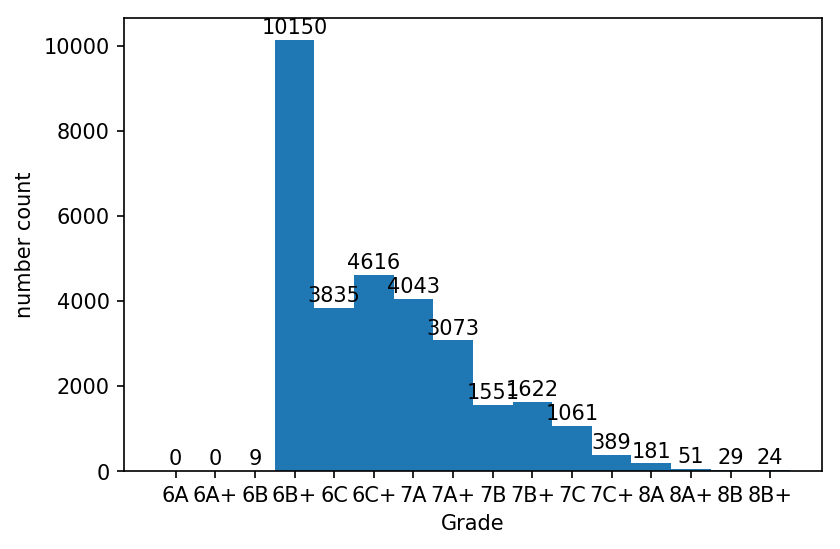

In [64]:
import matplotlib.pyplot as plt
plt.figure(dpi = 150)
result = plt.hist(Y_difficulties_merge, bins = np.arange(17)-0.5)
for x,y in zip(np.arange(16),result[0]):

    label = str(int(y))

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center')
plt.xticks(np.arange(16), ['6A','6A+','6B','6B+','6C','6C+','7A','7A+','7B','7B+','7C','7C+','8A','8A+','8B','8B+'])
plt.xlabel('Grade')
#plt.yscale('log')
plt.ylabel('number count')